# Linear Regression

## Independent Variables

Variables that values does not change by the effect of other variables.
It is usually used to manipulate other variables. Usually denoted as X.

## Dependent Variables

The values of these variables change when there is any change in the values of an independent variable. It is often denoted as y.

### Exampes:

The relationshp between Research and Development (R&D) costs and profitablity of companies can be easily illustrated as the amount of crop yeild (y) being dependent on the amount of rainfall (X)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
data = pd.read_csv('1000_Companies.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

In [40]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

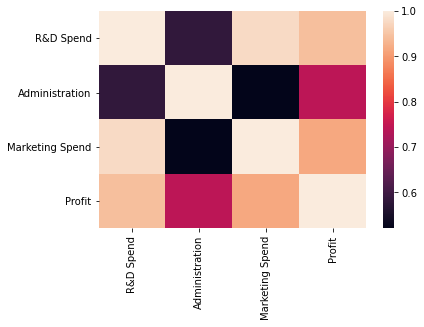

In [41]:
# Here we used heatmap from seaborn to visualise the 
#the correlation between costs
sns.heatmap(data.corr())

In [62]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([('State', OneHotEncoder(),[3])], remainder='passthrough')
ct.fit_transform(X)

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [63]:
X = X[:,1:]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = regressor.predict(X_test)
y_pred

array([ 90209.64901318,  88876.28325862,  95200.74973042, 174739.58503941,
        84013.74722284, 110572.81423949, 169438.58451208,  91855.1682484 ,
       163402.29005648,  54991.76617392,  67874.72481309, 150180.9861358 ,
       126512.60670878,  60430.86889281, 175991.46628657,  76097.46542299,
       118577.95366564, 163338.33779446, 165329.70854714, 180487.66382609,
       101238.40282718,  86180.18269683, 179933.75346041,  84689.06190888,
       105088.13051962, 101399.34780971,  40828.42858138,  58070.59626831,
        69777.85472814, 226802.72627013, 121052.52594777, 111658.45981284,
       101689.86321283, 137852.59801618,  64960.45224275, 108854.95146996,
       184345.94907957, 170595.15880734, 173725.92497117, 118014.06326024,
        97038.60706862, 164196.76013804, 107746.47058118,  52030.50278345,
       116882.08703837,  59741.11018494, 157857.27897357,  79750.07622713,
       159139.45816291, 131182.41311202, 183735.81760226, 173691.52102156,
        94077.16471212,  

In [67]:
# calculating coefficients
print(regressor.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [68]:
# calculating intercept
print(regressor.intercept_)

-88623.76527343778


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8985038788872522